### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

<h1>SOLUTION TO THE TASK 1 :UNSUPERVISED LEARNING DPHI</h1>:

In [1]:
#SOLUTIO TO THE TASK 1: UNSUPERVISED LEARNING BOOTCAMP
#mounting the drive to get the data
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#loading the data 
import pandas as pd 
data_facebook_live_server=pd.read_csv("/content/drive/MyDrive/Unsupervised Learning /Live_20210128.csv")

In [3]:
colm_del=['Column1','Column2','Column3','Column4','status_published','status_id']
for x in colm_del:
  del data_facebook_live_server[x]

In [4]:
data_facebook_live_server.shape 

(7050, 10)

In [5]:
#displaying concise summary for the data_facebook_live_server dataset
data_facebook_live_server.info()
#Two inference observed from the result
"""
1.The dataset is having  two categorical columns , ten integer datatype columns, and the four float datatype columns.
2.Also it shows that some columns are having null values while other are having non-null values 

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


'\n1.The dataset is having  two categorical columns , ten integer datatype columns, and the four float datatype columns.\n2.Also it shows that some columns are having null values while other are having non-null values \n\n'

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64


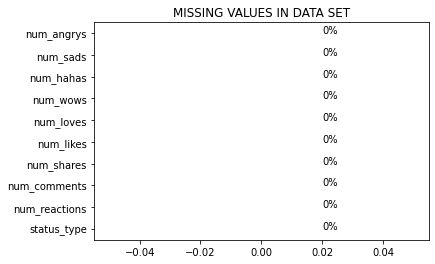

In [6]:
#EDA 
print(data_facebook_live_server.isnull().sum())
import matplotlib.pyplot as plt
group=data_facebook_live_server.isnull().sum().sort_values().plot(kind='barh')
plt.title("MISSING VALUES IN DATA SET")
for p in group.patches:
    z=((p.get_width()/data_facebook_live_server.shape[0])*100)
    per="{:,.0f}%".format(z)
    width=p.get_width()
    height=p.get_height()
    x=p.get_x() + width + 0.02 
    y=p.get_y() + height/2
    plt.annotate(per,(x,y)) 


#ANSWER: No .,,There is no Missing values 

In [7]:
#Display all the unique status_type of the dataframe
data_facebook_live_server['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [8]:
#Convert categorical variable, i.e., status_type into numerical representation using a label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_facebook_live_server['status_type']=encoder.fit_transform(data_facebook_live_server['status_type'])
data_facebook_live_server.info()
data_facebook_live_server.head()#checking if it is converted ..!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


<h1>SOLUTION TO THE TASK 2 :UNSUPERVISED LEARNING DPHI </h1>:

In [9]:
#Perform normalization to scale numerical data prior to modeling by using min-Max Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_facebook_live_server_scaled=scaler.fit_transform(data_facebook_live_server)
data_facebook_live_server=pd.DataFrame(data_facebook_live_server_scaled, columns=data_facebook_live_server.columns)
data_facebook_live_server.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [10]:
#Use Elbow method to determine the number of cluster to be formed
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data_facebook_live_server)
    kmeanModel.fit(data_facebook_live_server)
    distortions.append(sum(np.min(cdist(data_facebook_live_server, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data_facebook_live_server.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(data_facebook_live_server, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data_facebook_live_server.shape[0]
    mapping2[k] = kmeanModel.inertia_

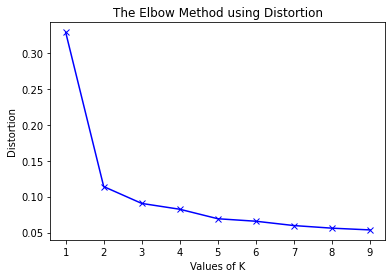

In [11]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#ANSWER : Hence the value of the k=3 , means optimal number of the clusters are  2 .

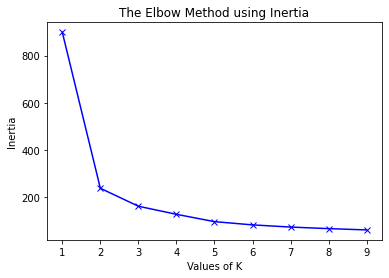

In [12]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#ANSWER : Hence the value of the k=3 , means optimal number of the clusters are  2 .

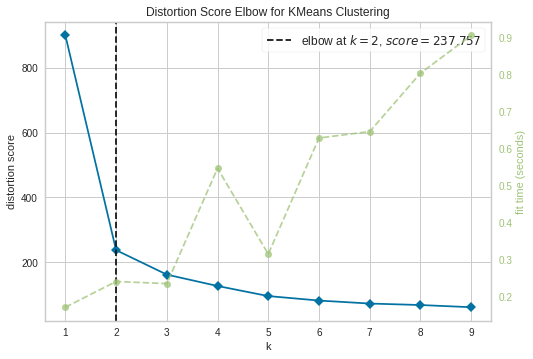

In [13]:
#By using KEelbow visualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(data_facebook_live_server) # Fit the data to the visualizer
visualizer.show()  

#ANSWER : Hence the value of the k=3 , means optimal number of the clusters are  2 .

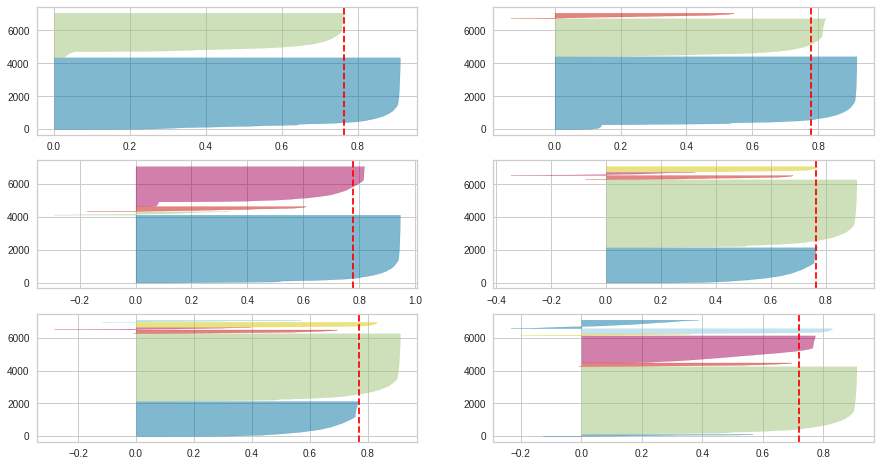

In [14]:
#Verify optimal number of clusers on the basis of silhouette scores
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
   #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
  #  Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
     # Fit the visualizer
    visualizer.fit(data_facebook_live_server) 

    #ANSWER : Hence the optimal clusters are 2 , since other number of the clusters are n0n-uniform thickness 

In [15]:
#Assigning cluster label to each instance of the dataframe


###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



<h1>SOLUTION TO THE TASK 3 :UNSUPERVISED LEARNING DPHI </h1>:

In [16]:
fruit_data=pd.read_csv("/content/drive/MyDrive/Unsupervised Learning /fruit_data.csv")
fruit_data.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [17]:
#Scale the value. Each feature should be centered (zero mean) and with unit variance
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_two=StandardScaler()
fruit_data_scaled=scaler_two.fit_transform(fruit_data)
fruit_data=pd.DataFrame(fruit_data_scaled,columns=fruit_data.columns)

In [18]:
#Use PCA to find the first two principal components of the fruit dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
fruit_data_reduced = pca.fit_transform(fruit_data)
principal_data_fruit = pd.DataFrame(fruit_data
             , columns = ['principal component 1', 'principal component 2'])
principal_data_fruit.head()

,principal component 1,principal component 2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [19]:
#Analysis - perform PCA with 4 components and print their explained variance_ratio
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
fruit_data_reduced = pca.fit_transform(fruit_data)
principal_data_fruit = pd.DataFrame(fruit_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.46714596 0.31485849 0.16064024 0.04624694]
